In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def generate_random_numbers():
    x_values = np.random.uniform(0.0, 1.0, size = (100, 1))
    noise = np.random.uniform(-0.3, 0.3, size = (100, 1))
    y_values = np.sin(2 * np.pi * X) + noise
    return x_values, y_values

In [27]:
X, y = generate_random_numbers()

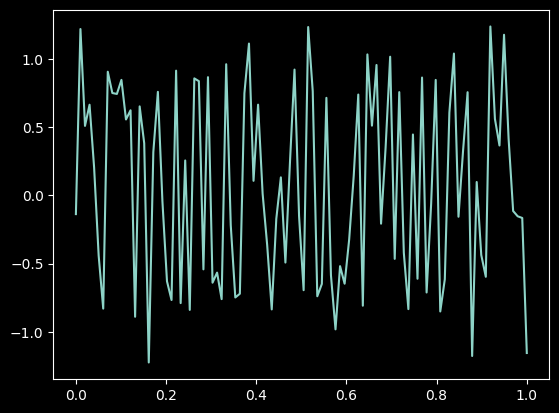

In [28]:
fig, ax = plt.subplots()
x_lin = np.linspace(0.0, 1.0, 100)
ax.plot(x_lin, y)
plt.show()

In [37]:
def sgd(x_values, y_values, alpha = 0.001):
    m = len(x_values)
    x_bias = np.c_[np.ones((m, 1)), x_values]
    dim = x_bias.shape[1]
    theta = np.random.uniform(-0.5, 0.5, size = dim).reshape(dim, 1)
    for i in range(m):
        gradients = x_bias.T.dot(y_values - x_bias.dot(theta))
        theta += alpha * gradients
    return theta

In [38]:
sgd(X, y)

array([[-0.03419786],
       [ 0.20804715]])